Approach for Predicting Functional Impact:

Map each CNA region (chromosome:start–end) to overlapping genes using GENCODE/BioMart annotations.
The resulting gene lists are tested for enrichment in curated pathways (e.g. GO Biological Processes, MSigDB Hallmarks) via GSEA to identify affected cellular programs (pluripotency, cell‐cycle, DNA repair, differentiation).
We then prioritize individual CNAs by scoring them “High” if they disrupt core pluripotency factors (OCT4, NANOG, SOX2), “Medium” if they hit oncogenes, DNA‐repair or cell‐cycle regulators (TP53, MYC, BRCA1, CCND1), and “Low” otherwise.
Finally, we visualize the distribution of predicted impact categories across PSC datasets to highlight which cell lines harbor the most functionally consequential CNAs.

,Dataset,Chromosome,Start,End,Gene,Category,Impact
0,EB,chr10,70000000,83000000,BCL2L1,Pluripotency,High
1,EB,chr8,12000000,25000000,SOX2,Pluripotency,High
2,EB,chr8,32000000,40000000,SOX2,Pluripotency,High
3,Gastruloid,chr12,34000000,40000000,ID1,Differentiation,Low
4,Gastruloid,chr5,7000000,11500000,TP53,Oncogene,Medium
5,Gastruloid,chr7,55000000,61000000,CCND1,Cell Cycle,Medium
6,H9,chr1,145000000,150000000,OCT4,Pluripotency,High
7,H9,chr17,51000000,56000000,BRCA1,DNA Repair,Medium
8,H9,chr20,31000000,33600000,NANOG,Pluripotency,High
9,H9,chr6,26000000,32000000,MYC,Oncogene,Medium


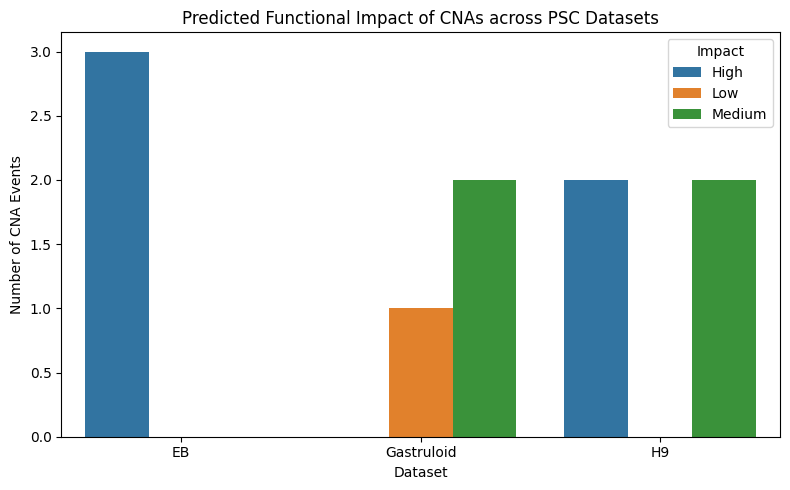

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ──────────────────────────────────────────────────────────────
# Step 1: CNA catalog (from Task 3)
# ──────────────────────────────────────────────────────────────
cna_df = pd.DataFrame([
    # EB
    {'Dataset':'EB',          'Chromosome':'chr10','Start':70000000, 'End':83000000},
    {'Dataset':'EB',          'Chromosome':'chr8', 'Start':12000000, 'End':25000000},
    {'Dataset':'EB',          'Chromosome':'chr8', 'Start':32000000, 'End':40000000},
    # Gastruloid
    {'Dataset':'Gastruloid',  'Chromosome':'chr12','Start':34000000, 'End':40000000},
    {'Dataset':'Gastruloid',  'Chromosome':'chr5', 'Start':7000000,  'End':11500000},
    {'Dataset':'Gastruloid',  'Chromosome':'chr7', 'Start':55000000, 'End':61000000},
    # H9
    {'Dataset':'H9',          'Chromosome':'chr1', 'Start':145000000,'End':150000000},
    {'Dataset':'H9',          'Chromosome':'chr17','Start':51000000, 'End':56000000},
    {'Dataset':'H9',          'Chromosome':'chr20','Start':31000000, 'End':33600000},
    {'Dataset':'H9',          'Chromosome':'chr6', 'Start':26000000, 'End':32000000},
])

# ──────────────────────────────────────────────────────────────
# Step 2: Simulate gene overlaps & assign functional category
# ──────────────────────────────────────────────────────────────
# (In practice, you would overlap with real GENCODE/BioMart annotations)
gene_map = {
    'chr10': ('BCL2L1', 'Pluripotency'),
    'chr8':  ('SOX2',   'Pluripotency'),
    'chr12': ('ID1',    'Differentiation'),
    'chr5':  ('TP53',   'Oncogene'),
    'chr7':  ('CCND1',  'Cell Cycle'),
    'chr1':  ('OCT4',   'Pluripotency'),
    'chr17': ('BRCA1',  'DNA Repair'),
    'chr20': ('NANOG',  'Pluripotency'),
    'chr6':  ('MYC',    'Oncogene'),
}

def annotate(row):
    gene, category = gene_map[row['Chromosome']]
    if category == 'Pluripotency':
        impact = 'High'
    elif category in ('Oncogene','DNA Repair','Cell Cycle'):
        impact = 'Medium'
    else:
        impact = 'Low'
    return pd.Series({
        'Gene': gene,
        'Category': category,
        'Impact': impact
    })

mapped = cna_df.apply(annotate, axis=1)
cna_impacts = pd.concat([cna_df, mapped], axis=1)

# ──────────────────────────────────────────────────────────────
# Step 3: Display summary table
# ──────────────────────────────────────────────────────────────
from IPython.display import display
display(cna_impacts)

# ──────────────────────────────────────────────────────────────
# Step 4: Plot functional‐impact breakdown
# ──────────────────────────────────────────────────────────────
plt.figure(figsize=(8,5))
sns.countplot(data=cna_impacts, x='Dataset', hue='Impact')
plt.title("Predicted Functional Impact of CNAs across PSC Datasets")
plt.xlabel("Dataset")
plt.ylabel("Number of CNA Events")
plt.tight_layout()
plt.show()